In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        44.5884 (43.0312, 45.1837) (43.4176, 45.2000)  1.7824 (Jnode 202)\n',
 't_n104        30.2270 (27.1018, 32.6229) (27.3049, 32.7580)  5.4530 (Jnode 201)\n',
 't_n105        29.2628 (26.2080, 31.6674) (26.4125, 31.8149)  5.4024 (Jnode 200)\n',
 't_n106        26.6365 (23.8095, 29.0557) (23.9361, 29.1533)  5.2172 (Jnode 199)\n',
 't_n107        25.9266 (23.1728, 28.3205) (23.2897, 28.4111)  5.1214 (Jnode 198)\n',
 't_n108        24.5781 (21.9547, 26.9571) (22.0500, 27.0331)  4.9831 (Jnode 197)\n',
 't_n109        12.3514 (11.2139, 14.0564) (11.1134, 13.8990)  2.7857 (Jnode 196)\n',
 't_n110        12.2428 (11.1211, 13.9370) (11.0236, 13.7826)  2.7590 (Jnode 195)\n',
 't_n111        11.8823 (10.8064, 13.5266) (10.7068, 13.3710)  2.6643 (Jnode 194)\n',
 't_n112        11.4057 (10.3848, 12.9867) (10.2925, 12.8385)  2.5459 (Jnode 193)\n',
 't_n113        10.8345 ( 9.8851, 12.3344) ( 9.7923, 12.1918)  2.3995 (Jnode 192)\n',
 't_n114         7.2497 ( 6.4284,  8.3693) ( 6.3657,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[44.5884,
 30.227,
 29.2628,
 26.6365,
 25.9266,
 24.5781,
 12.3514,
 12.2428,
 11.8823,
 11.4057,
 10.8345,
 7.2497,
 4.353,
 2.5288,
 1.9772,
 8.2314,
 6.9959,
 11.3776,
 7.1333,
 10.9088,
 8.7183,
 7.0904,
 5.9092,
 10.5993,
 9.9768,
 2.6781,
 11.7543,
 10.6119,
 8.2296,
 6.5886,
 7.2552,
 6.6108,
 5.5194,
 5.429,
 22.9743,
 18.7105,
 24.7914,
 22.9074,
 21.508,
 17.8767,
 9.605,
 17.2088,
 15.1481,
 13.4779,
 11.4237,
 20.8685,
 19.373,
 5.1177,
 2.2615,
 27.612,
 25.9196,
 23.4498,
 22.7967,
 24.7651,
 17.2238,
 20.7864,
 16.7727,
 29.5591,
 28.0416,
 25.6994,
 24.2926,
 20.8049,
 13.8917,
 18.515,
 25.2391,
 8.3043,
 25.4216,
 35.5536,
 34.7623,
 34.0203,
 32.6573,
 30.1961,
 28.8316,
 27.8315,
 26.6498,
 23.8309,
 20.6933,
 17.5032,
 24.1403,
 22.6945,
 18.0879,
 20.5221,
 26.0519,
 24.0,
 22.176,
 19.1984,
 13.021,
 24.5577,
 22.0597,
 19.4904,
 28.7183,
 27.2063,
 25.7954,
 22.935,
 16.9346,
 25.741,
 17.5882,
 14.1512,
 5.5914,
 34.4587,
 30.078]

In [7]:
lower_ci_iqtree

[5.1837,
 2.6229,
 1.6674,
 9.0557,
 8.3205,
 6.9571,
 4.0564,
 3.937,
 3.5266,
 2.9867,
 0.8851,
 0.4284,
 0.2079,
 0.373,
 0.3736,
 0.134,
 0.9026,
 2.9561,
 0.8255,
 0.903,
 0.6458,
 0.9835,
 0.5539,
 0.4806,
 0.8642,
 0.7002,
 3.387,
 0.5199,
 0.9764,
 0.3312,
 0.1459,
 0.5416,
 0.5357,
 0.0064,
 5.397,
 1.6655,
 7.1784,
 5.3509,
 4.0139,
 0.6455,
 0.44,
 0.1399,
 8.2024,
 6.5358,
 0.6231,
 3.4982,
 2.1853,
 0.5286,
 0.05,
 0.0822,
 8.5204,
 6.4198,
 5.8851,
 7.4711,
 1.048,
 3.9429,
 0.3547,
 1.9886,
 0.5413,
 8.3891,
 7.129,
 3.9786,
 8.2346,
 1.8922,
 8.1335,
 0.7442,
 8.4367,
 7.2208,
 6.2056,
 5.3267,
 3.7209,
 1.4533,
 0.2414,
 9.3312,
 8.2718,
 5.842,
 3.1054,
 0.3288,
 6.0795,
 4.7873,
 0.8528,
 2.9238,
 7.74,
 5.9453,
 4.351,
 1.7299,
 6.4932,
 6.4379,
 4.2607,
 2.0684,
 0.1622,
 8.8829,
 7.7258,
 5.4069,
 0.4483,
 7.7953,
 1.037,
 7.722,
 0.2337,
 6.1948,
 2.439]

In [8]:
upper_ci_iqtree

[43.4176,
 27.3049,
 26.4125,
 23.9361,
 23.2897,
 22.05,
 11.1134,
 11.0236,
 10.7068,
 10.2925,
 12.3344,
 8.3693,
 4.745,
 2.7523,
 2.7843,
 9.5559,
 8.2191,
 10.244,
 8.7411,
 12.4253,
 10.0621,
 8.3311,
 7.5224,
 12.1709,
 11.5111,
 3.9311,
 10.5414,
 12.1002,
 9.599,
 7.8919,
 8.2877,
 7.6273,
 6.5243,
 7.2948,
 20.4531,
 15.6299,
 22.2279,
 20.335,
 18.8995,
 14.9151,
 12.825,
 14.0724,
 11.9554,
 10.4233,
 14.4043,
 18.1738,
 16.5475,
 7.8925,
 3.8435,
 24.783,
 23.0773,
 20.2756,
 19.5828,
 21.7693,
 12.368,
 17.2737,
 12.5997,
 26.6748,
 25.1436,
 22.7603,
 21.2405,
 17.6094,
 10.3966,
 15.1949,
 22.0088,
 12.7159,
 22.0464,
 34.2398,
 33.6797,
 33.0814,
 32.26,
 28.8692,
 27.2737,
 26.143,
 24.8524,
 21.6119,
 18.0244,
 14.3638,
 22.0131,
 20.4552,
 14.9306,
 17.9895,
 24.1765,
 21.9767,
 19.9471,
 16.8062,
 10.4131,
 22.5552,
 19.7377,
 16.8322,
 27.0769,
 25.2581,
 23.5378,
 20.0249,
 12.5216,
 23.3412,
 14.1386,
 10.7328,
 8.1865,
 32.9097,
 26.9919]

In [9]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

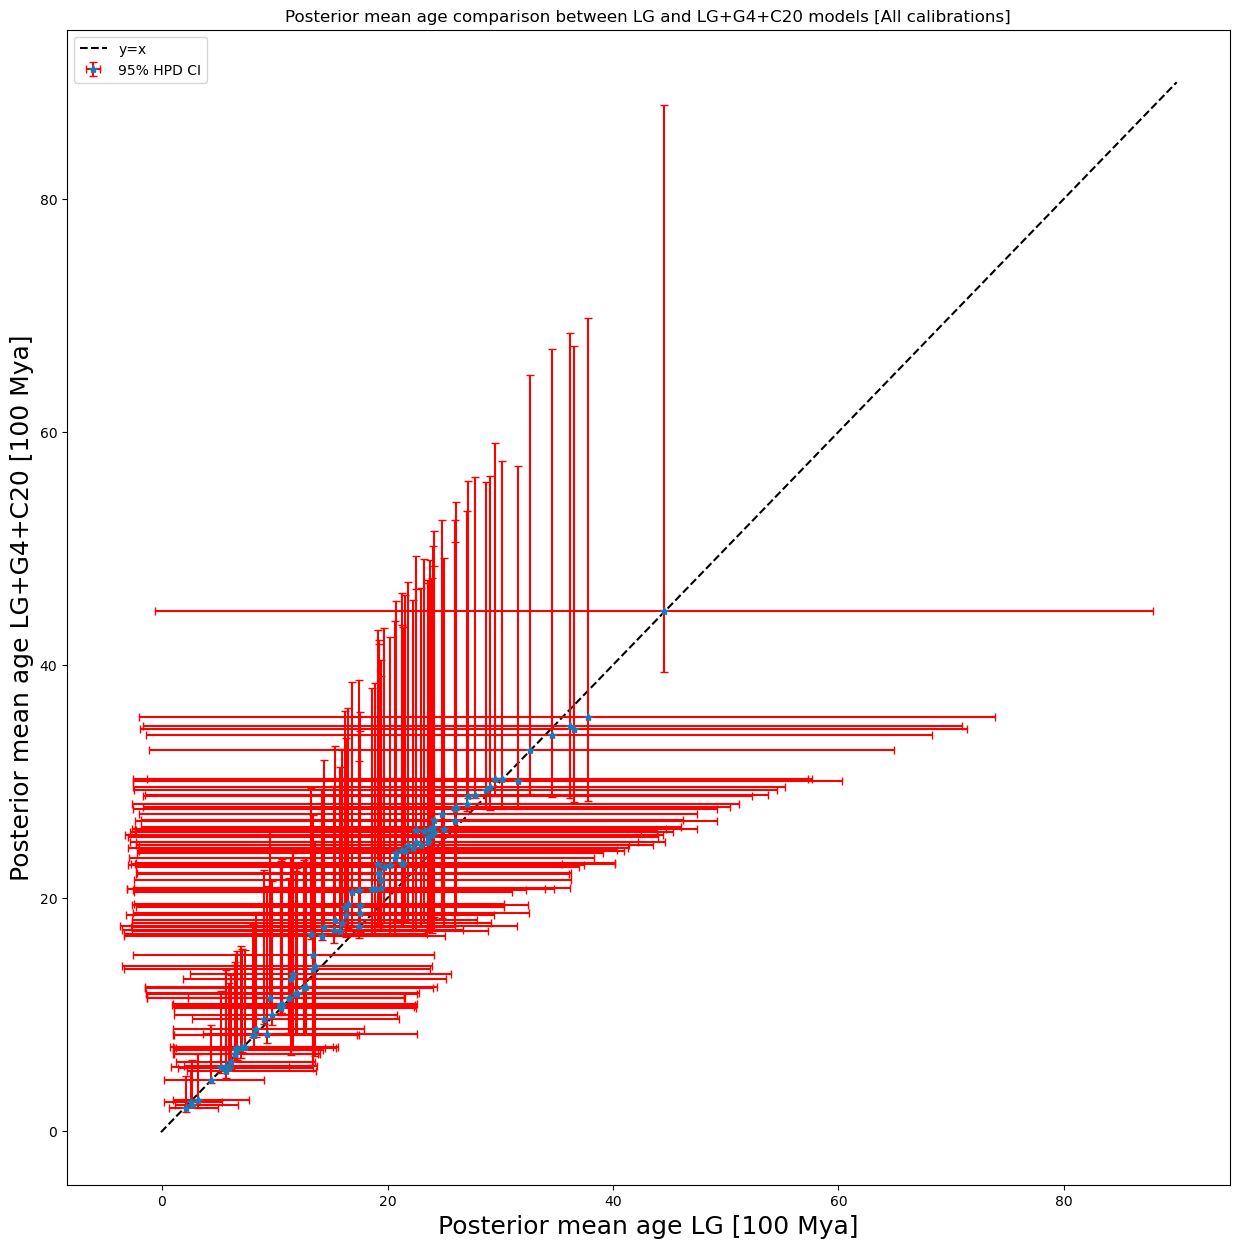

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,90], 
        [-0.1, 90], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [All calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_all.png')

In [11]:
posterior_mean_baseml

[44.5673,
 30.1583,
 28.6943,
 25.9474,
 25.0059,
 22.9499,
 12.8087,
 12.6316,
 11.9728,
 11.2926,
 10.5907,
 7.1124,
 4.3467,
 2.543,
 2.1501,
 8.0516,
 6.597,
 11.2819,
 7.0013,
 10.666,
 8.3757,
 6.656,
 6.1265,
 10.5905,
 9.7827,
 3.2102,
 11.8992,
 10.5482,
 8.1683,
 6.4756,
 7.3175,
 6.43,
 5.1949,
 5.9175,
 21.2449,
 17.5645,
 23.5711,
 21.3474,
 19.4127,
 15.9578,
 9.04,
 15.7839,
 13.4177,
 11.5856,
 9.5569,
 19.4181,
 17.598,
 5.6858,
 2.6609,
 25.9933,
 23.7294,
 20.6434,
 20.2389,
 22.5349,
 15.2175,
 18.5787,
 14.1599,
 29.1063,
 27.066,
 24.1588,
 22.2232,
 18.9235,
 13.4049,
 16.3075,
 23.6073,
 9.3301,
 23.979,
 37.8006,
 36.1629,
 34.6319,
 32.6762,
 29.5457,
 27.7272,
 26.1164,
 24.129,
 20.7887,
 17.4738,
 14.3767,
 21.3203,
 19.6819,
 15.3836,
 16.8068,
 24.0377,
 21.5597,
 19.2484,
 16.2564,
 11.4024,
 21.8161,
 19.2747,
 16.4718,
 27.1253,
 24.8381,
 22.4999,
 19.154,
 13.2555,
 23.2521,
 17.4999,
 13.5845,
 5.6624,
 36.5469,
 31.5972]

In [12]:
posterior_mean_iqtree

[44.5884,
 30.227,
 29.2628,
 26.6365,
 25.9266,
 24.5781,
 12.3514,
 12.2428,
 11.8823,
 11.4057,
 10.8345,
 7.2497,
 4.353,
 2.5288,
 1.9772,
 8.2314,
 6.9959,
 11.3776,
 7.1333,
 10.9088,
 8.7183,
 7.0904,
 5.9092,
 10.5993,
 9.9768,
 2.6781,
 11.7543,
 10.6119,
 8.2296,
 6.5886,
 7.2552,
 6.6108,
 5.5194,
 5.429,
 22.9743,
 18.7105,
 24.7914,
 22.9074,
 21.508,
 17.8767,
 9.605,
 17.2088,
 15.1481,
 13.4779,
 11.4237,
 20.8685,
 19.373,
 5.1177,
 2.2615,
 27.612,
 25.9196,
 23.4498,
 22.7967,
 24.7651,
 17.2238,
 20.7864,
 16.7727,
 29.5591,
 28.0416,
 25.6994,
 24.2926,
 20.8049,
 13.8917,
 18.515,
 25.2391,
 8.3043,
 25.4216,
 35.5536,
 34.7623,
 34.0203,
 32.6573,
 30.1961,
 28.8316,
 27.8315,
 26.6498,
 23.8309,
 20.6933,
 17.5032,
 24.1403,
 22.6945,
 18.0879,
 20.5221,
 26.0519,
 24.0,
 22.176,
 19.1984,
 13.021,
 24.5577,
 22.0597,
 19.4904,
 28.7183,
 27.2063,
 25.7954,
 22.935,
 16.9346,
 25.741,
 17.5882,
 14.1512,
 5.5914,
 34.4587,
 30.078]

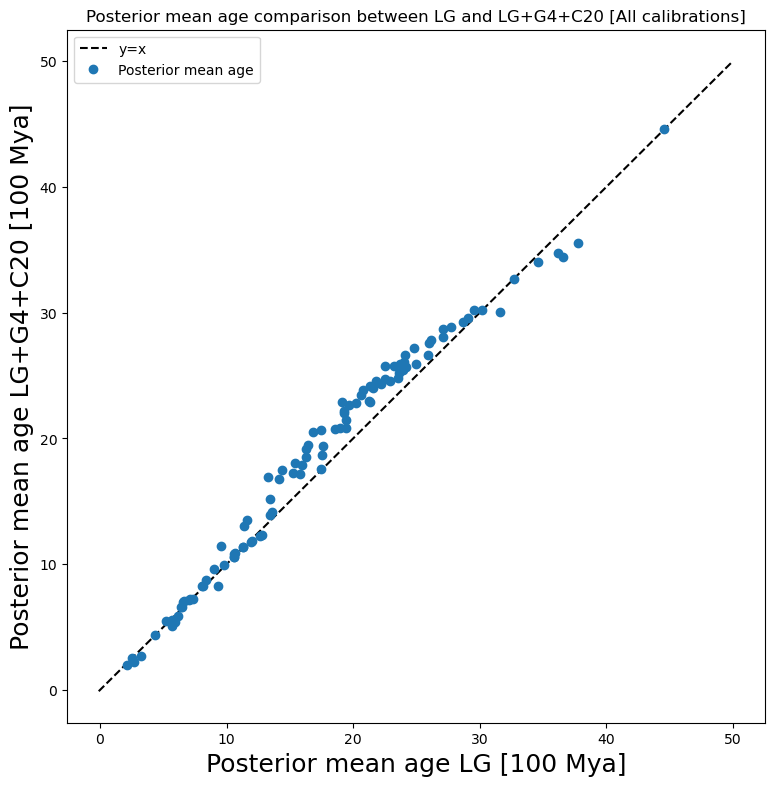

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_all_scatter.png')

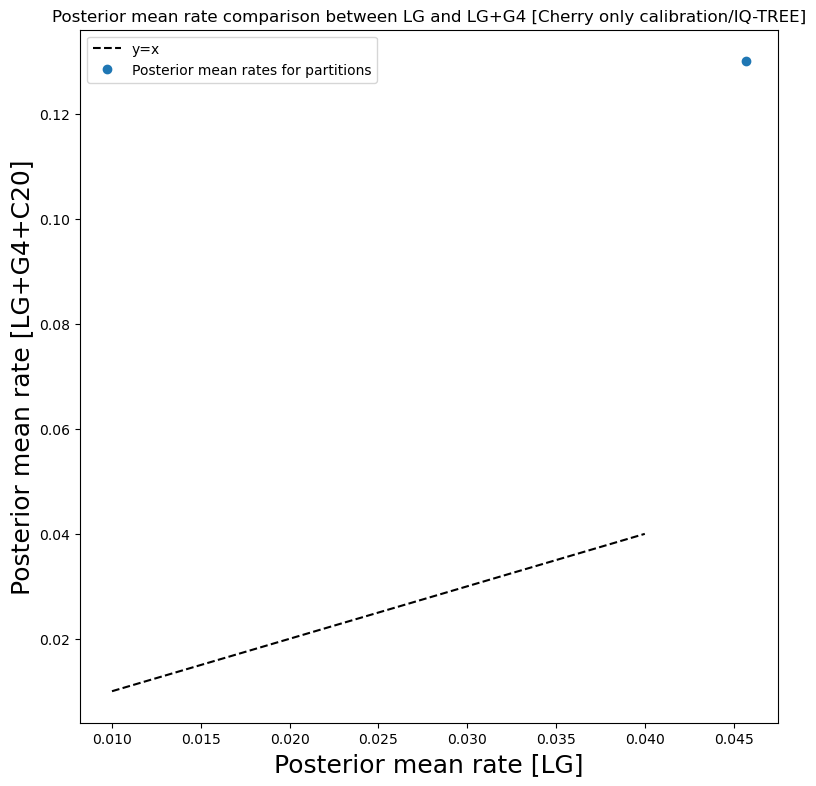

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.04], 
        [0.01, 0.04], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
ax.set_ylabel('Posterior mean rate [LG+G4+C20]', fontsize=18)
ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_C20_all_scatter.png')